In [50]:
import pandas as pd
import yaml
import os

In [51]:
# get parent directory
parent_dir = os.path.dirname(os.getcwd())

In [52]:
config_file_path = os.path.join(parent_dir, 'config.yaml')

with open(config_file_path, 'r') as f:
    config = yaml.safe_load(f)

dataset = config['dataset_path']

### 1. Data Cleaning
- Drop rows with missing values.
- Normalize the description by making text lowercase, removing punctuation, special characters and special words.

In [53]:
# read dataset into pandas dataframe and drop first column
df = pd.read_csv(os.path.join(parent_dir, dataset), index_col=0)

# print data shape
print(f'Dataset Rows: {df.shape[0]} \nDataset Columns: {df.shape[1]}')

# Removing rows with missing values
df.dropna(subset=['country', 'description', 'price', 'points', 'winery', 'variety'], inplace=True)

# print data shape
print(f'Dataset Rows: {df.shape[0]} \nDataset Columns: {df.shape[1]}')

Dataset Rows: 150930 
Dataset Columns: 10
Dataset Rows: 137230 
Dataset Columns: 10


In [54]:
import string
df['description'] = df['description'].apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))

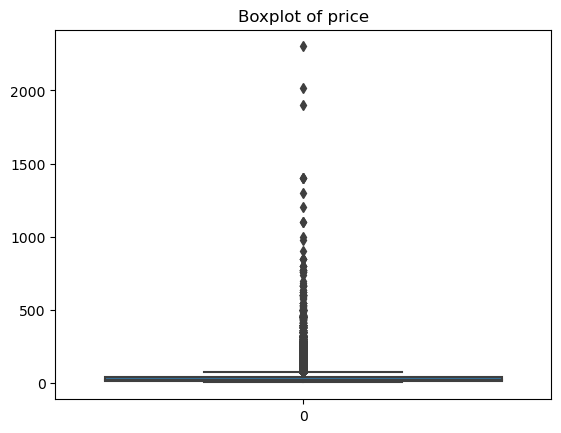

Descriptive Statistics of price:
count    137230.000000
mean         33.132019
std          36.323072
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

Number of Outliers in price: 7582


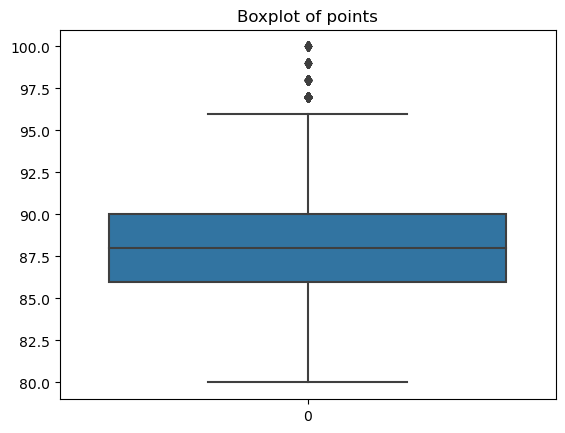

Descriptive Statistics of points:
count    137230.000000
mean         87.788035
std           3.221572
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

Number of Outliers in points: 481


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# dataset = pd.read_csv('your_dataset.csv')

def examine_outliers(df, column):
    # Boxplot
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

    # Descriptive statistics
    desc = df[column].describe()
    print(f"Descriptive Statistics of {column}:\n{desc}\n")

    # IQR
    Q1 = desc['25%']
    Q3 = desc['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of Outliers in {column}: {len(outliers)}")
    
    return outliers

# Examining outliers in 'price' and 'points' columns
price_outliers = examine_outliers(df, 'price')
points_outliers = examine_outliers(df, 'points')


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Feature and Label
X = df['description']
y = df['variety']

# Text Pre-processing with TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # limit to 5000 features
X_vectorized = vectorizer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42)

# Training a Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classificationReport = classification_report(y_test, y_pred, target_names=y.unique())
confusionMat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{classificationReport}")
print(f"Confusion Matrix:\n{confusionMat}")

# Visualizing the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusionMat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ValueError: Number of classes, 430, does not match size of target_names, 619. Try specifying the labels parameter